# XML gaze data to pandas data and figures

In [1]:
#additional helpful source:
#http://docs.python-guide.org/en/latest/scenarios/xml/

import xmltodict
import pandas as pd
import time
import glob

In [2]:
## Test
# start = time.time()
# koe = xml_to_dict('data_1_24_2018_11_25_05_AM_corrected.xml')
# end = time.time()
# print(end - start), ' seconds'

In [3]:
filelist = [fil for fil in glob.glob('../../ETRAdata/FixedETRAdata/*.xml')]

In [4]:
filelist[:2]

['../../ETRAdata/FixedETRAdata\\data_1_24_2018_10_03_50_AM.xml',
 '../../ETRAdata/FixedETRAdata\\data_1_24_2018_10_08_56_AM.xml']

In [5]:
filepairs = [(i, k) for i,k in zip(filelist[0::2], filelist[1::2])]

In [6]:
filepairs[0]

('../../ETRAdata/FixedETRAdata\\data_1_24_2018_10_03_50_AM.xml',
 '../../ETRAdata/FixedETRAdata\\data_1_24_2018_10_08_56_AM.xml')

## Functions

### Import XML to dict

In [7]:
def xml_to_dict(filepath):
    with open(filepath) as fd:
        myxml = xmltodict.parse(fd.read())
    
    return myxml

### Dict to pandas

In [8]:
'''Read attributes to pandas format'''
def read_to_pandas(myxml, session, pid):
   

    hx = [i['@GazePointUnity'][1:-2].split(",")[0] for i in myxml['Data']['GazePointCombined']]
    hy = [i['@GazePointUnity'][1:-2].split(",")[1] for i in myxml['Data']['GazePointCombined']]
    hz = [i['@GazePointUnity'][1:-2].split(",")[2] for i in myxml['Data']['GazePointCombined']]
    hs = [i['@stage'] for i in myxml['Data']['StageType']] 
    ht = [i['@type'] for i in myxml['Data']['StageType']] 
    hse = [session for i in myxml['Data']['StageType']]
    hid = [pid for i in myxml['Data']['StageType']]

    mylist = zip (hx, hy, hz, hs, ht, hse, hid)
    
    return pd.DataFrame(mylist, columns=['gpu_x','gpu_y','gpu_z','stage','type', 'session', 'pid'])
    

## Define and read two XML files to one pandas dataframe

In [9]:
idx = 0
df = pd.DataFrame()
for a, b in zip(filelist[0::2], filelist[1::2]):
    
    # Define paths
    filea = a #'../../ETRAdata/FixedETRAdata/data_1_24_2018_1_11_41_PM.xml'
    fileb = b #'../../ETRAdata/FixedETRAdata/data_1_24_2018_1_18_25_PM.xml'

    start = time.time() # start timer

    print a
    print b
#     print '---'
    dfa = read_to_pandas(xml_to_dict(filea), 1, idx) #read file a
    dfb = read_to_pandas(xml_to_dict(fileb), 2, idx) #read file a
    dft = pd.concat([dfa, dfb]).reset_index(drop=True) #combine dataframes
    df = pd.concat([df, dft]).reset_index(drop=True) #combine dataframes
    
    idx +=1

    end = time.time()
    print(end - start), ' seconds'

../../ETRAdata/FixedETRAdata\data_1_24_2018_10_03_50_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_08_56_AM.xml
28.5210001469  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_17_33_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_23_07_AM.xml
28.6849999428  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_31_43_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_37_00_AM.xml
28.2920000553  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_48_56_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_10_55_00_AM.xml
26.8190000057  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_11_03_16_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_11_10_13_AM.xml
22.8539998531  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_11_17_50_AM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_11_25_05_AM.xml
23.2650001049  seconds
../../ETRAdata/FixedETRAdata\data_1_24_2018_12_16_17_PM.xml
../../ETRAdata/FixedETRAdata\data_1_24_2018_12_23_00_PM.xml
24.5690000057  seconds

#### Checks

In [10]:
df.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1,0
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1,0


In [11]:
df.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
714292,0000.56250630,0000.47521070,-0022.5834900,4,2,2,11
714293,0000.56250630,0000.47521070,-0022.5834900,4,2,2,11


In [12]:
dfa.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1,11
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1,11


In [13]:
dfb.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
0,0000.00000000,0000.00000000,-0000.7800000,0,2,2,11
1,0000.00000000,0000.00000000,-0000.7800000,0,2,2,11


In [14]:
dfa.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
29689,0000.99280720,0000.73532530,-0022.5841400,4,2,1,11
29690,0000.99280720,0000.73532530,-0022.5841400,4,2,1,11


In [15]:
dfb.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session,pid
29735,0000.56250630,0000.47521070,-0022.5834900,4,2,2,11
29736,0000.56250630,0000.47521070,-0022.5834900,4,2,2,11


In [16]:
'''Check the length and data format'''
len(dfa), len(dfb), len(df), type(df.gpu_x[0])

(29691, 29737, 714294, unicode)

## Data massage

In [17]:
'''Remove extra white space and cpnvert to float format'''
cols = ['gpu_x', 'gpu_y', 'gpu_z', 'stage', 'type', 'session']
df[cols] = df[cols].replace(' ','').astype(float)

In [18]:
'''Normed z value: inverse of (min-max scaling + .1)
.1 added to avoid 0'''
norm = lambda x: 1/(((x - x.min()) / (x.max()-x.min()))+.1)
df['gpu_nz'] = df['gpu_z'].transform(norm)

In [19]:
# Check
df['gpu_nz'].min(), df['gpu_nz'].max()

(0.90909090909090906, 10.0)

## Figures

In [20]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

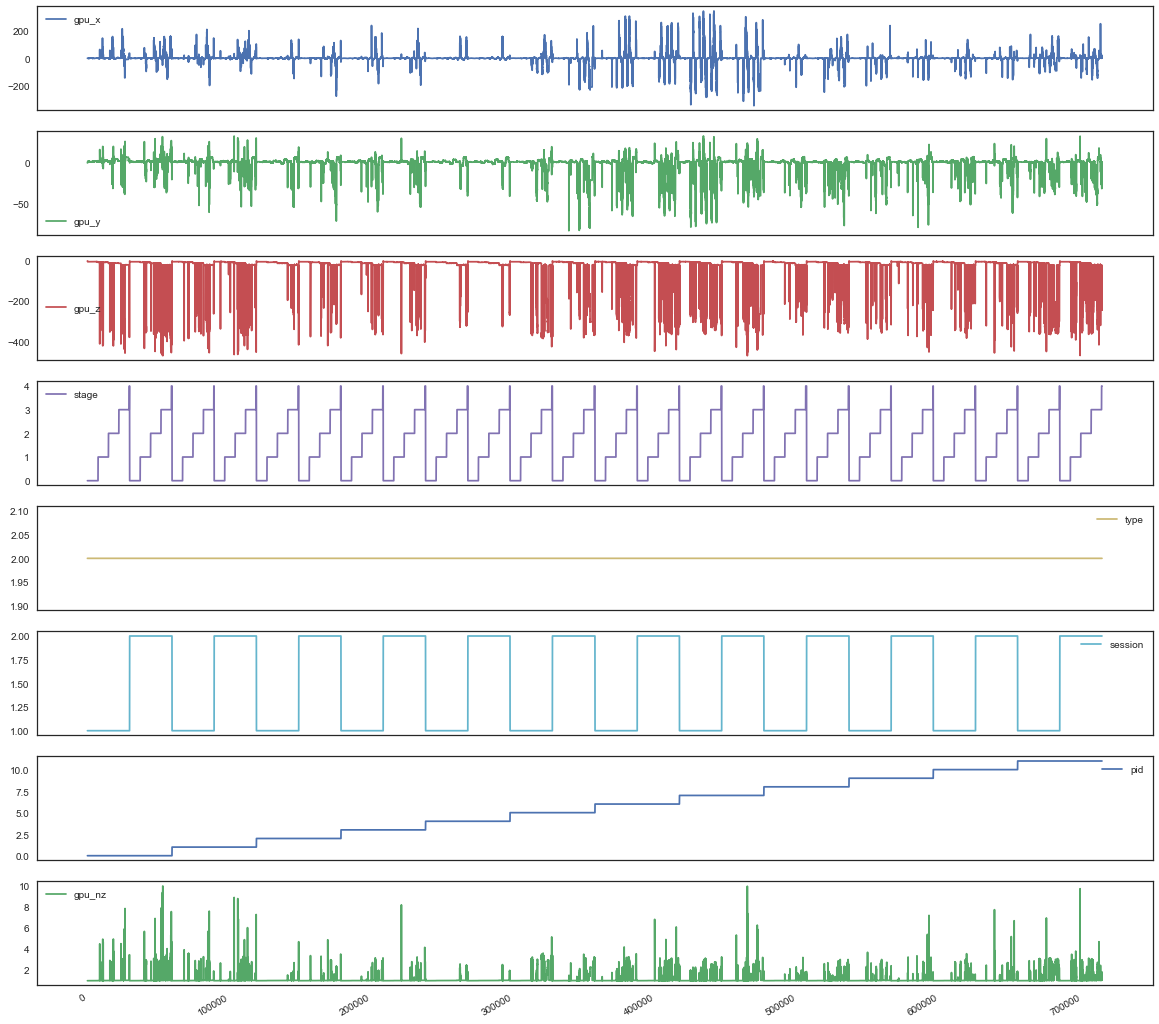

In [21]:
'''Just out of curiosity'''
df.plot(subplots=True, figsize=(20,20));

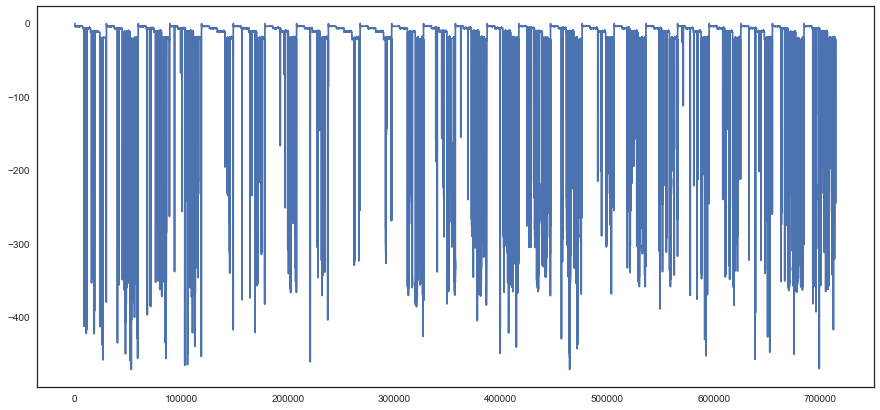

In [22]:
%matplotlib inline
df.gpu_z.plot(figsize=(15,7));

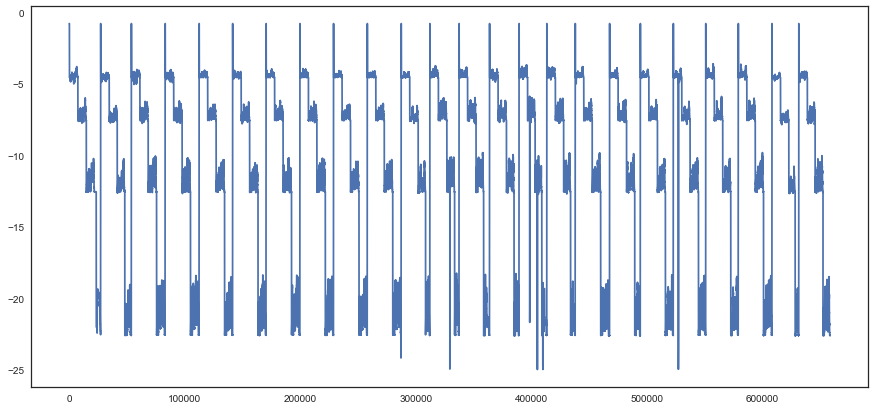

In [23]:
%matplotlib inline
df[df.gpu_z>-25].gpu_z.reset_index(drop=True).plot(figsize=(15,7));

In [24]:
len(df[df.gpu_z<-25])/float(len(df)), len(df[df.gpu_z<-25])

(0.07763889938876709, 55457)

### Plot x and y

In [25]:
#import seaborn as sns
import matplotlib.cm as cm

#### Stage 0, Sessions 1 and 2

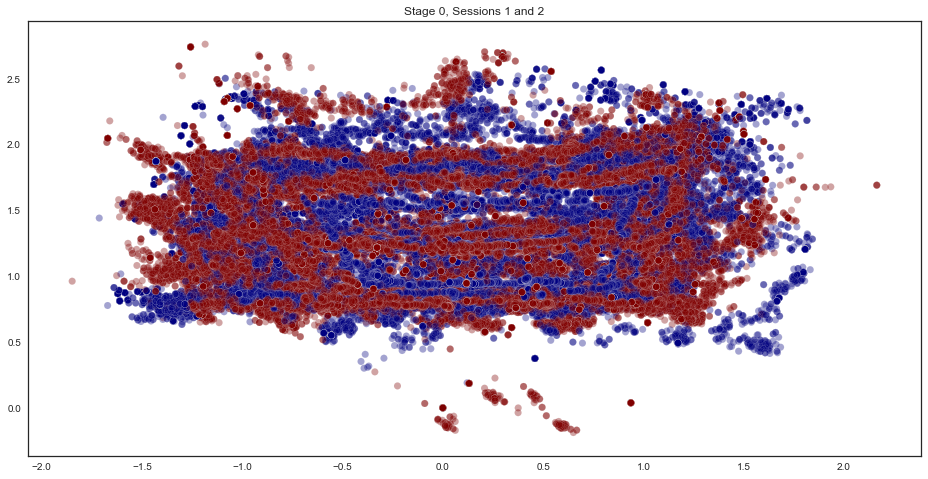

In [26]:
data = df[(df.stage==0)&(df.gpu_z>-25)&(df.gpu_x<3)]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.2, c=data['session'], edgecolors='w', s=50, cmap='jet')
 
plt.title('Stage 0, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

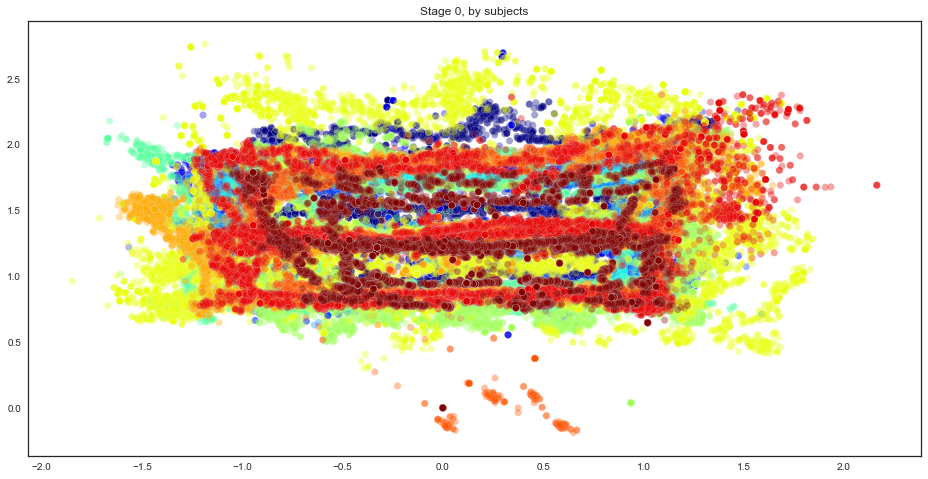

In [28]:
data = df[(df.stage==0)&(df.gpu_z>-25)&(df.gpu_x<3)]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat in zip(myzip):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.2, c=data['pid'], edgecolors='w', s=50, cmap='jet')
 
plt.title('Stage 0, by subjects');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

#### Stage 3, Sessions 1 and 2

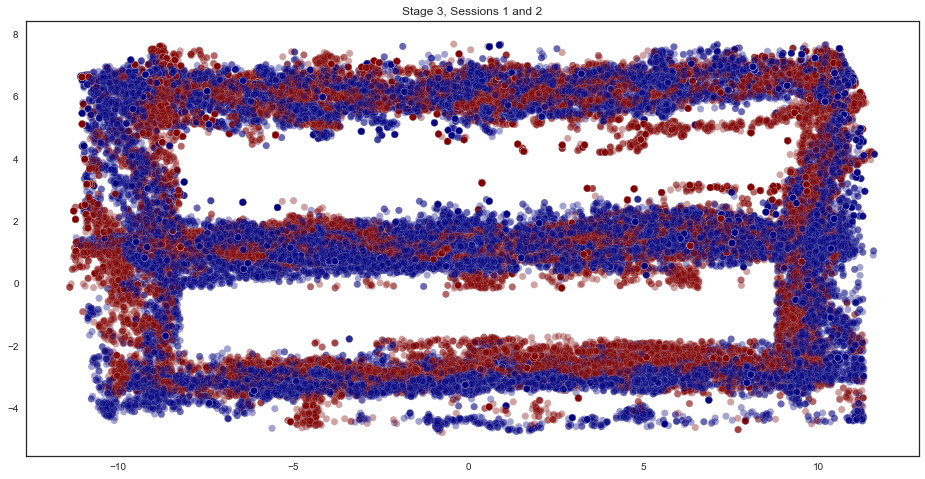

In [29]:
data = df[(df.stage==3)&(df.gpu_z>-25)&(df.gpu_x<15)]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.2, c=data['session'], edgecolors='w', s=50, cmap='jet_r')
 
plt.title('Stage 3, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

In [30]:
minmax = lambda x: (x - x.min()) / (x.max() - x.min())
# dfs = standardise(df, featcols, groupby, zscore)


dfs = df.copy()
n = 10
dfs=dfs[(dfs.gpu_x!=0)&(dfs.gpu_y!=0)]
dfs = dfs[(dfs.gpu_x<n)&(dfs.gpu_x>-n)&(dfs.gpu_y<n)&(dfs.gpu_y>-n)]

featcols=['gpu_x','gpu_y']
# new subject level standardized dataframe
dfs[featcols] = dfs[featcols].groupby([dfs.stage]).transform(minmax)

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


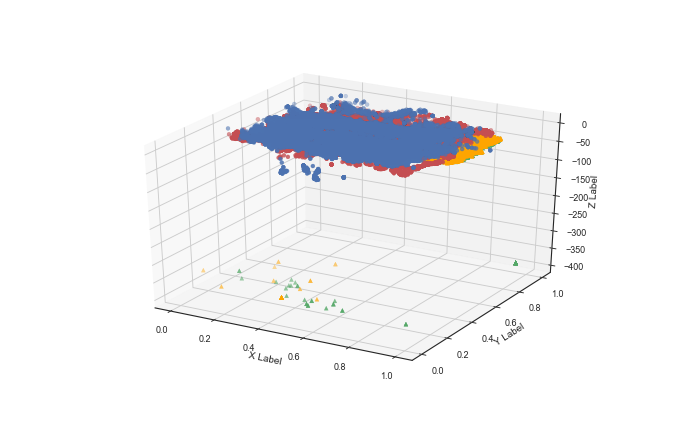

In [33]:
#matplotlib notebook
%matplotlib nbagg
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_x
ys = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_y
zs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_z
xs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_x
ys2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_y
zs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_z

xt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_x
yt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_y
zt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_z
xt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_x
yt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_y
zt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='g', marker='^')
ax.scatter(xt2, yt2, zt2, c='orange', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


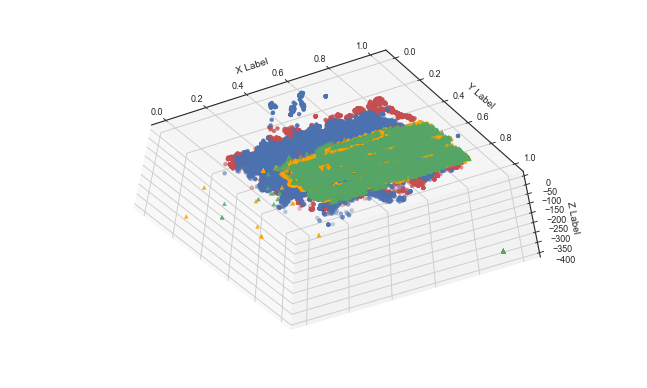

In [34]:
#matplotlib notebook
%matplotlib nbagg
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_x
ys = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_y
zs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_z
xs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_x
ys2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_y
zs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_z

xt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_x
yt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_y
zt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_z
xt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_x
yt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_y
zt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='g', marker='^')
ax.scatter(xt2, yt2, zt2, c='orange', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()